In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ZBH
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


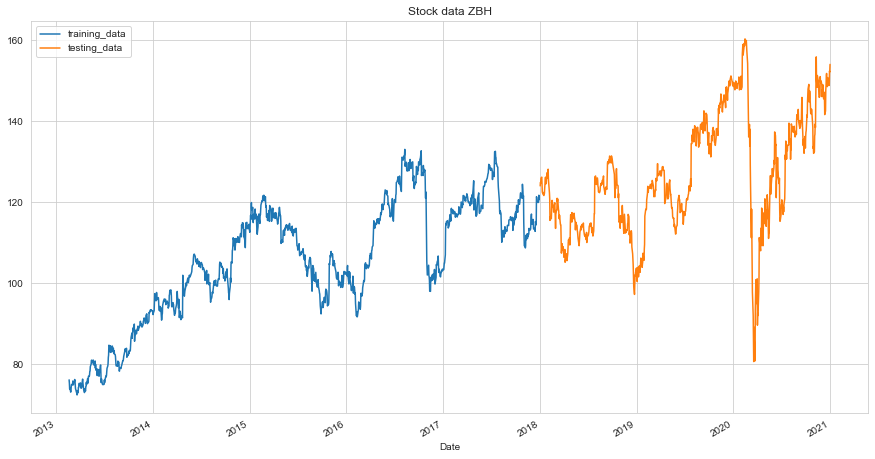

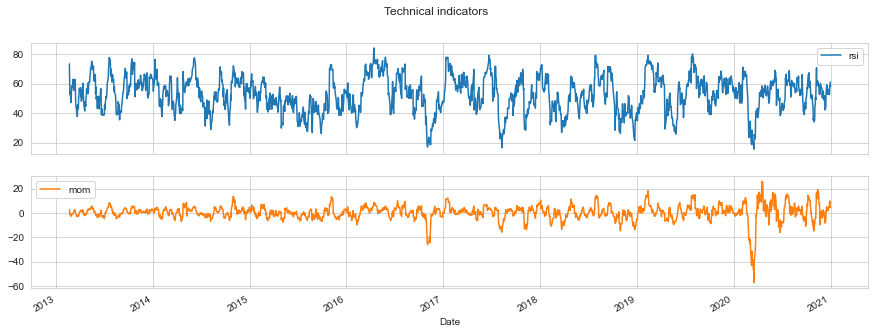

In [2]:
stock_name = 'zbh'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1317.42, duration: 0:00:00.486109
episode: 2/2000, episode end value: 1315.59, duration: 0:00:00.419096
episode: 3/2000, episode end value: 1256.63, duration: 0:00:00.460102
episode: 4/2000, episode end value: 1305.55, duration: 0:00:00.533125
episode: 5/2000, episode end value: 1300.87, duration: 0:00:00.519115
episode: 6/2000, episode end value: 1286.67, duration: 0:00:00.482105
episode: 7/2000, episode end value: 1316.65, duration: 0:00:00.480111
episode: 8/2000, episode end value: 1312.74, duration: 0:00:00.565128
episode: 9/2000, episode end value: 1312.53, duration: 0:00:00.562125
episode: 10/2000, episode end value: 1316.65, duration: 0:00:00.613139
episode: 11/2000, episode end value: 1301.92, duration: 0:00:00.490113
episode: 12/2000, episode end value: 1325.33, duration: 0:00:00.572129
episode: 13/2000, episode end value: 1337.06, duration: 0:00:00.516119
episode: 14/2000, episode end value: 1295.43, duration: 0:00:00.484110
episode: 15/200

episode: 117/2000, episode end value: 1316.84, duration: 0:00:00.515120
episode: 118/2000, episode end value: 1300.03, duration: 0:00:00.477106
episode: 119/2000, episode end value: 1311.41, duration: 0:00:00.475107
episode: 120/2000, episode end value: 1304.98, duration: 0:00:00.453104
episode: 121/2000, episode end value: 1310.87, duration: 0:00:00.544072
episode: 122/2000, episode end value: 1307.11, duration: 0:00:00.538123
episode: 123/2000, episode end value: 1318.35, duration: 0:00:00.589133
episode: 124/2000, episode end value: 1304.08, duration: 0:00:00.522117
episode: 125/2000, episode end value: 1299.99, duration: 0:00:00.441099
episode: 126/2000, episode end value: 1299.90, duration: 0:00:00.462106
episode: 127/2000, episode end value: 1300.55, duration: 0:00:00.421094
episode: 128/2000, episode end value: 1314.83, duration: 0:00:00.500113
episode: 129/2000, episode end value: 1325.49, duration: 0:00:00.446107
episode: 130/2000, episode end value: 1307.77, duration: 0:00:00

episode: 231/2000, episode end value: 1295.14, duration: 0:00:00.550126
episode: 232/2000, episode end value: 1310.73, duration: 0:00:00.576127
episode: 233/2000, episode end value: 1329.37, duration: 0:00:00.429099
episode: 234/2000, episode end value: 1300.47, duration: 0:00:00.440101
episode: 235/2000, episode end value: 1318.91, duration: 0:00:00.524117
episode: 236/2000, episode end value: 1312.48, duration: 0:00:00.493112
episode: 237/2000, episode end value: 1294.20, duration: 0:00:00.473107
episode: 238/2000, episode end value: 1303.51, duration: 0:00:00.451102
episode: 239/2000, episode end value: 1319.29, duration: 0:00:00.504115
episode: 240/2000, episode end value: 1309.73, duration: 0:00:00.510112
episode: 241/2000, episode end value: 1314.58, duration: 0:00:00.496110
episode: 242/2000, episode end value: 1307.86, duration: 0:00:00.500093
episode: 243/2000, episode end value: 1317.64, duration: 0:00:00.519117
episode: 244/2000, episode end value: 1317.48, duration: 0:00:00

episode: 345/2000, episode end value: 1314.68, duration: 0:00:00.531118
episode: 346/2000, episode end value: 1316.33, duration: 0:00:00.546124
episode: 347/2000, episode end value: 1317.59, duration: 0:00:00.540118
episode: 348/2000, episode end value: 1292.20, duration: 0:00:00.441101
episode: 349/2000, episode end value: 1316.40, duration: 0:00:00.541123
episode: 350/2000, episode end value: 1310.14, duration: 0:00:00.483111
episode: 351/2000, episode end value: 1298.54, duration: 0:00:00.494111
episode: 352/2000, episode end value: 1291.20, duration: 0:00:00.427097
episode: 353/2000, episode end value: 1319.99, duration: 0:00:00.478114
episode: 354/2000, episode end value: 1322.94, duration: 0:00:00.470108
episode: 355/2000, episode end value: 1320.04, duration: 0:00:00.558784
episode: 356/2000, episode end value: 1314.47, duration: 0:00:00.520112
episode: 357/2000, episode end value: 1304.29, duration: 0:00:00.445689
episode: 358/2000, episode end value: 1295.66, duration: 0:00:00

episode: 459/2000, episode end value: 1316.07, duration: 0:00:00.542073
episode: 460/2000, episode end value: 1320.83, duration: 0:00:00.498886
episode: 461/2000, episode end value: 1318.89, duration: 0:00:00.541123
episode: 462/2000, episode end value: 1319.28, duration: 0:00:00.486110
episode: 463/2000, episode end value: 1318.97, duration: 0:00:00.533120
episode: 464/2000, episode end value: 1318.68, duration: 0:00:00.562127
episode: 465/2000, episode end value: 1324.80, duration: 0:00:00.450101
episode: 466/2000, episode end value: 1273.59, duration: 0:00:00.423099
episode: 467/2000, episode end value: 1315.56, duration: 0:00:00.533125
episode: 468/2000, episode end value: 1319.08, duration: 0:00:00.471220
episode: 469/2000, episode end value: 1316.63, duration: 0:00:00.468058
episode: 470/2000, episode end value: 1308.31, duration: 0:00:00.483110
episode: 471/2000, episode end value: 1320.02, duration: 0:00:00.491111
episode: 472/2000, episode end value: 1316.86, duration: 0:00:00

episode: 573/2000, episode end value: 1316.73, duration: 0:00:00.487110
episode: 574/2000, episode end value: 1319.17, duration: 0:00:00.534121
episode: 575/2000, episode end value: 1322.15, duration: 0:00:00.476107
episode: 576/2000, episode end value: 1316.97, duration: 0:00:00.462106
episode: 577/2000, episode end value: 1315.15, duration: 0:00:00.476107
episode: 578/2000, episode end value: 1321.32, duration: 0:00:00.537123
episode: 579/2000, episode end value: 1288.99, duration: 0:00:00.477108
episode: 580/2000, episode end value: 1317.79, duration: 0:00:00.560126
episode: 581/2000, episode end value: 1315.71, duration: 0:00:00.527120
episode: 582/2000, episode end value: 1314.03, duration: 0:00:00.509119
episode: 583/2000, episode end value: 1288.36, duration: 0:00:00.513113
episode: 584/2000, episode end value: 1320.53, duration: 0:00:00.545129
episode: 585/2000, episode end value: 1323.39, duration: 0:00:00.493103
episode: 586/2000, episode end value: 1291.12, duration: 0:00:00

episode: 687/2000, episode end value: 1316.63, duration: 0:00:00.464104
episode: 688/2000, episode end value: 1311.75, duration: 0:00:00.436097
episode: 689/2000, episode end value: 1310.45, duration: 0:00:00.532120
episode: 690/2000, episode end value: 1314.96, duration: 0:00:00.433102
episode: 691/2000, episode end value: 1317.31, duration: 0:00:00.513114
episode: 692/2000, episode end value: 1318.61, duration: 0:00:00.488108
episode: 693/2000, episode end value: 1316.11, duration: 0:00:00.529125
episode: 694/2000, episode end value: 1319.76, duration: 0:00:00.476050
episode: 695/2000, episode end value: 1316.37, duration: 0:00:00.467432
episode: 696/2000, episode end value: 1316.96, duration: 0:00:00.544861
episode: 697/2000, episode end value: 1324.36, duration: 0:00:00.524115
episode: 698/2000, episode end value: 1316.91, duration: 0:00:00.566126
episode: 699/2000, episode end value: 1317.45, duration: 0:00:00.586133
episode: 700/2000, episode end value: 1318.15, duration: 0:00:00

episode: 801/2000, episode end value: 1316.94, duration: 0:00:00.561125
episode: 802/2000, episode end value: 1318.13, duration: 0:00:00.509115
episode: 803/2000, episode end value: 1319.65, duration: 0:00:00.461103
episode: 804/2000, episode end value: 1321.94, duration: 0:00:00.482108
episode: 805/2000, episode end value: 1316.46, duration: 0:00:00.463109
episode: 806/2000, episode end value: 1318.67, duration: 0:00:00.495113
episode: 807/2000, episode end value: 1322.64, duration: 0:00:00.507114
episode: 808/2000, episode end value: 1308.72, duration: 0:00:00.431097
episode: 809/2000, episode end value: 1317.08, duration: 0:00:00.537122
episode: 810/2000, episode end value: 1319.24, duration: 0:00:00.423101
episode: 811/2000, episode end value: 1307.09, duration: 0:00:00.498110
episode: 812/2000, episode end value: 1312.38, duration: 0:00:00.423100
episode: 813/2000, episode end value: 1315.38, duration: 0:00:00.516115
episode: 814/2000, episode end value: 1321.63, duration: 0:00:00

episode: 915/2000, episode end value: 1323.29, duration: 0:00:00.492115
episode: 916/2000, episode end value: 1320.29, duration: 0:00:00.493112
episode: 917/2000, episode end value: 1348.56, duration: 0:00:00.433097
episode: 918/2000, episode end value: 1319.16, duration: 0:00:00.507114
episode: 919/2000, episode end value: 1323.09, duration: 0:00:00.551124
episode: 920/2000, episode end value: 1327.48, duration: 0:00:00.466104
episode: 921/2000, episode end value: 1315.06, duration: 0:00:00.507821
episode: 922/2000, episode end value: 1308.03, duration: 0:00:00.443325
episode: 923/2000, episode end value: 1310.49, duration: 0:00:00.517121
episode: 924/2000, episode end value: 1321.67, duration: 0:00:00.502110
episode: 925/2000, episode end value: 1318.66, duration: 0:00:00.486110
episode: 926/2000, episode end value: 1317.80, duration: 0:00:00.506121
episode: 927/2000, episode end value: 1317.22, duration: 0:00:00.609134
episode: 928/2000, episode end value: 1320.45, duration: 0:00:00

episode: 1029/2000, episode end value: 1297.85, duration: 0:00:00.438099
episode: 1030/2000, episode end value: 1292.19, duration: 0:00:00.412087
episode: 1031/2000, episode end value: 1336.80, duration: 0:00:00.520116
episode: 1032/2000, episode end value: 1288.20, duration: 0:00:00.414095
episode: 1033/2000, episode end value: 1317.07, duration: 0:00:00.344078
episode: 1034/2000, episode end value: 1300.43, duration: 0:00:00.473110
episode: 1035/2000, episode end value: 1321.28, duration: 0:00:00.514113
episode: 1036/2000, episode end value: 1319.98, duration: 0:00:00.491110
episode: 1037/2000, episode end value: 1310.65, duration: 0:00:00.439100
episode: 1038/2000, episode end value: 1293.55, duration: 0:00:00.449105
episode: 1039/2000, episode end value: 1315.59, duration: 0:00:00.495114
episode: 1040/2000, episode end value: 1321.13, duration: 0:00:00.437096
episode: 1041/2000, episode end value: 1321.44, duration: 0:00:00.517115
episode: 1042/2000, episode end value: 1322.28, dur

episode: 1142/2000, episode end value: 1318.69, duration: 0:00:00.460105
episode: 1143/2000, episode end value: 1293.80, duration: 0:00:00.490109
episode: 1144/2000, episode end value: 1314.77, duration: 0:00:00.505118
episode: 1145/2000, episode end value: 1314.99, duration: 0:00:00.475108
episode: 1146/2000, episode end value: 1317.36, duration: 0:00:00.468109
episode: 1147/2000, episode end value: 1314.83, duration: 0:00:00.479110
episode: 1148/2000, episode end value: 1333.76, duration: 0:00:00.425094
episode: 1149/2000, episode end value: 1308.37, duration: 0:00:00.466106
episode: 1150/2000, episode end value: 1317.30, duration: 0:00:00.461105
episode: 1151/2000, episode end value: 1317.94, duration: 0:00:00.546123
episode: 1152/2000, episode end value: 1318.06, duration: 0:00:00.532118
episode: 1153/2000, episode end value: 1349.15, duration: 0:00:00.537617
episode: 1154/2000, episode end value: 1313.42, duration: 0:00:00.583131
episode: 1155/2000, episode end value: 1319.56, dur

episode: 1255/2000, episode end value: 1312.89, duration: 0:00:00.483110
episode: 1256/2000, episode end value: 1318.35, duration: 0:00:00.476108
episode: 1257/2000, episode end value: 1314.48, duration: 0:00:00.494113
episode: 1258/2000, episode end value: 1315.39, duration: 0:00:00.401609
episode: 1259/2000, episode end value: 1315.08, duration: 0:00:00.475184
episode: 1260/2000, episode end value: 1277.77, duration: 0:00:00.351076
episode: 1261/2000, episode end value: 1310.43, duration: 0:00:00.487107
episode: 1262/2000, episode end value: 1317.72, duration: 0:00:00.460331
episode: 1263/2000, episode end value: 1313.26, duration: 0:00:00.531329
episode: 1264/2000, episode end value: 1317.21, duration: 0:00:00.435098
episode: 1265/2000, episode end value: 1315.84, duration: 0:00:00.449102
episode: 1266/2000, episode end value: 1314.40, duration: 0:00:00.480109
episode: 1267/2000, episode end value: 1311.40, duration: 0:00:00.387093
episode: 1268/2000, episode end value: 1311.82, dur

episode: 1368/2000, episode end value: 1329.07, duration: 0:00:00.441095
episode: 1369/2000, episode end value: 1321.62, duration: 0:00:00.459104
episode: 1370/2000, episode end value: 1319.27, duration: 0:00:00.474106
episode: 1371/2000, episode end value: 1349.89, duration: 0:00:00.341598
episode: 1372/2000, episode end value: 1318.90, duration: 0:00:00.363144
episode: 1373/2000, episode end value: 1335.65, duration: 0:00:00.318073
episode: 1374/2000, episode end value: 1314.73, duration: 0:00:00.383083
episode: 1375/2000, episode end value: 1318.79, duration: 0:00:00.374085
episode: 1376/2000, episode end value: 1318.84, duration: 0:00:00.376089
episode: 1377/2000, episode end value: 1315.09, duration: 0:00:00.387643
episode: 1378/2000, episode end value: 1320.05, duration: 0:00:00.384341
episode: 1379/2000, episode end value: 1319.03, duration: 0:00:00.361084
episode: 1380/2000, episode end value: 1318.57, duration: 0:00:00.391085
episode: 1381/2000, episode end value: 1321.97, dur

episode: 1481/2000, episode end value: 1316.83, duration: 0:00:00.368086
episode: 1482/2000, episode end value: 1317.93, duration: 0:00:00.486111
episode: 1483/2000, episode end value: 1317.81, duration: 0:00:00.386087
episode: 1484/2000, episode end value: 1323.57, duration: 0:00:00.362081
episode: 1485/2000, episode end value: 1320.20, duration: 0:00:00.429095
episode: 1486/2000, episode end value: 1316.06, duration: 0:00:00.401090
episode: 1487/2000, episode end value: 1319.87, duration: 0:00:00.406100
episode: 1488/2000, episode end value: 1315.97, duration: 0:00:00.393085
episode: 1489/2000, episode end value: 1317.32, duration: 0:00:00.408671
episode: 1490/2000, episode end value: 1318.70, duration: 0:00:00.336330
episode: 1491/2000, episode end value: 1320.56, duration: 0:00:00.404227
episode: 1492/2000, episode end value: 1314.43, duration: 0:00:00.340736
episode: 1493/2000, episode end value: 1317.35, duration: 0:00:00.387087
episode: 1494/2000, episode end value: 1313.01, dur

episode: 1594/2000, episode end value: 1321.37, duration: 0:00:00.294067
episode: 1595/2000, episode end value: 1316.39, duration: 0:00:00.299066
episode: 1596/2000, episode end value: 1319.77, duration: 0:00:00.294067
episode: 1597/2000, episode end value: 1326.68, duration: 0:00:00.303078
episode: 1598/2000, episode end value: 1311.67, duration: 0:00:00.289076
episode: 1599/2000, episode end value: 1313.47, duration: 0:00:00.296069
episode: 1600/2000, episode end value: 1290.70, duration: 0:00:00.237042
episode: 1601/2000, episode end value: 1326.85, duration: 0:00:00.283078
episode: 1602/2000, episode end value: 1299.28, duration: 0:00:00.235037
episode: 1603/2000, episode end value: 1311.53, duration: 0:00:00.288065
episode: 1604/2000, episode end value: 1319.64, duration: 0:00:00.278068
episode: 1605/2000, episode end value: 1315.64, duration: 0:00:00.282062
episode: 1606/2000, episode end value: 1316.33, duration: 0:00:00.281063
episode: 1607/2000, episode end value: 1320.55, dur

episode: 1707/2000, episode end value: 1325.77, duration: 0:00:00.279056
episode: 1708/2000, episode end value: 1320.88, duration: 0:00:00.267052
episode: 1709/2000, episode end value: 1281.24, duration: 0:00:00.215049
episode: 1710/2000, episode end value: 1308.12, duration: 0:00:00.259059
episode: 1711/2000, episode end value: 1315.98, duration: 0:00:00.285064
episode: 1712/2000, episode end value: 1316.88, duration: 0:00:00.269063
episode: 1713/2000, episode end value: 1318.76, duration: 0:00:00.261059
episode: 1714/2000, episode end value: 1319.55, duration: 0:00:00.263058
episode: 1715/2000, episode end value: 1319.64, duration: 0:00:00.261060
episode: 1716/2000, episode end value: 1320.63, duration: 0:00:00.272077
episode: 1717/2000, episode end value: 1313.90, duration: 0:00:00.270073
episode: 1718/2000, episode end value: 1316.26, duration: 0:00:00.260696
episode: 1719/2000, episode end value: 1314.24, duration: 0:00:00.272075
episode: 1720/2000, episode end value: 1316.96, dur

episode: 1820/2000, episode end value: 1316.79, duration: 0:00:00.229658
episode: 1821/2000, episode end value: 1315.80, duration: 0:00:00.247049
episode: 1822/2000, episode end value: 1320.71, duration: 0:00:00.236110
episode: 1823/2000, episode end value: 1320.57, duration: 0:00:00.242025
episode: 1824/2000, episode end value: 1317.12, duration: 0:00:00.253115
episode: 1825/2000, episode end value: 1319.10, duration: 0:00:00.239628
episode: 1826/2000, episode end value: 1316.55, duration: 0:00:00.243074
episode: 1827/2000, episode end value: 1320.21, duration: 0:00:00.252356
episode: 1828/2000, episode end value: 1314.44, duration: 0:00:00.239126
episode: 1829/2000, episode end value: 1316.04, duration: 0:00:00.221438
episode: 1830/2000, episode end value: 1322.81, duration: 0:00:00.263041
episode: 1831/2000, episode end value: 1313.80, duration: 0:00:00.248066
episode: 1832/2000, episode end value: 1316.91, duration: 0:00:00.239060
episode: 1833/2000, episode end value: 1318.62, dur

episode: 1933/2000, episode end value: 1321.47, duration: 0:00:00.241054
episode: 1934/2000, episode end value: 1314.46, duration: 0:00:00.246063
episode: 1935/2000, episode end value: 1316.67, duration: 0:00:00.242039
episode: 1936/2000, episode end value: 1306.55, duration: 0:00:00.242047
episode: 1937/2000, episode end value: 1314.90, duration: 0:00:00.245058
episode: 1938/2000, episode end value: 1314.93, duration: 0:00:00.234060
episode: 1939/2000, episode end value: 1316.93, duration: 0:00:00.238054
episode: 1940/2000, episode end value: 1317.40, duration: 0:00:00.241039
episode: 1941/2000, episode end value: 1314.36, duration: 0:00:00.233067
episode: 1942/2000, episode end value: 1316.87, duration: 0:00:00.242050
episode: 1943/2000, episode end value: 1316.97, duration: 0:00:00.235067
episode: 1944/2000, episode end value: 1316.51, duration: 0:00:00.231054
episode: 1945/2000, episode end value: 1317.87, duration: 0:00:00.235044
episode: 1946/2000, episode end value: 1310.60, dur

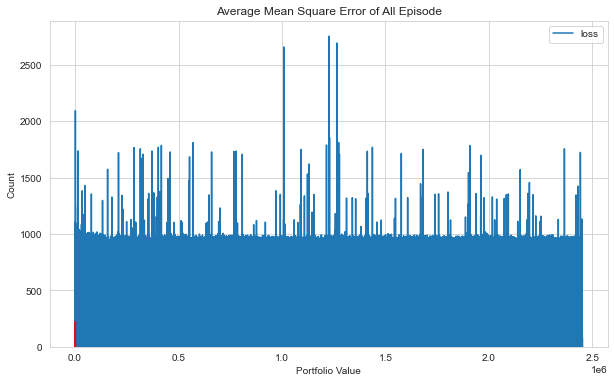

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

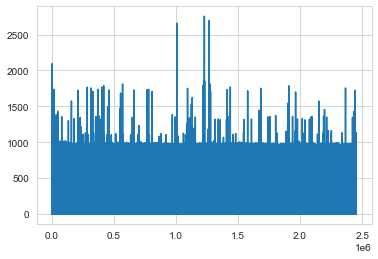

In [5]:
plt.plot(agent.model.losses)

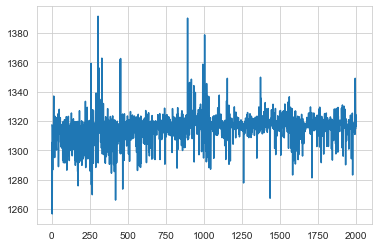

In [6]:
plt.plot(portfolio_value)

episode end value: 1237.28, duration: 0:00:00.097035
Sell: 370 times, Buy: 362 times


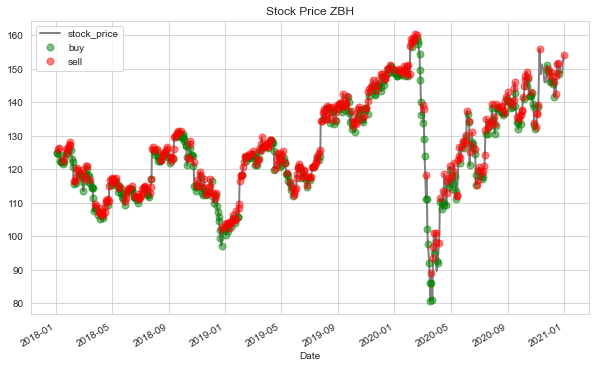

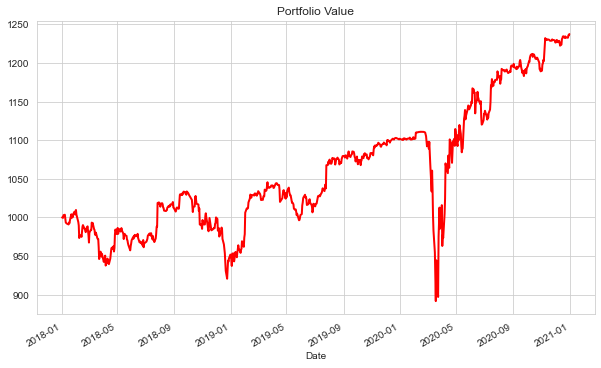

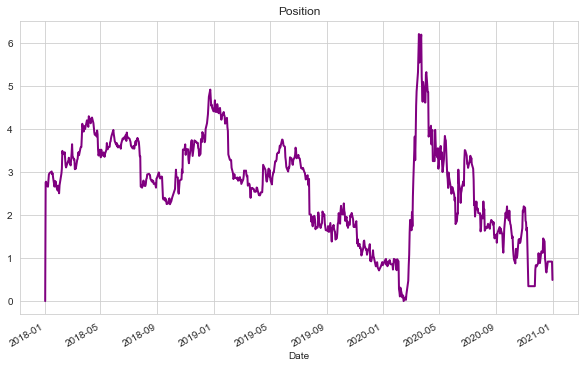

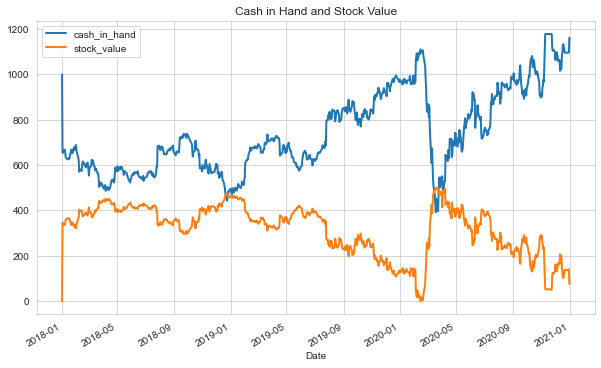

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ZBH
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.36 %
Volatility: 0.1318
shape ratio: 0.4745
Maximun drawdown: -19.72 %
Calmar ratio: 0.3730
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 7.49 %
Volatility (benchmark): 0.3431
shape ratio: 0.1863
Maximun drawdown: -49.73 %
Calmar ratio (benchmark): 0.1507


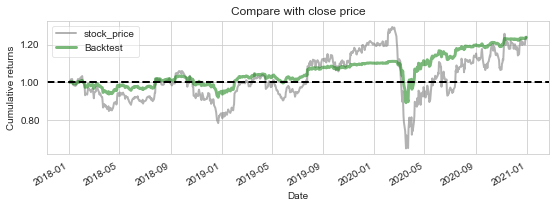

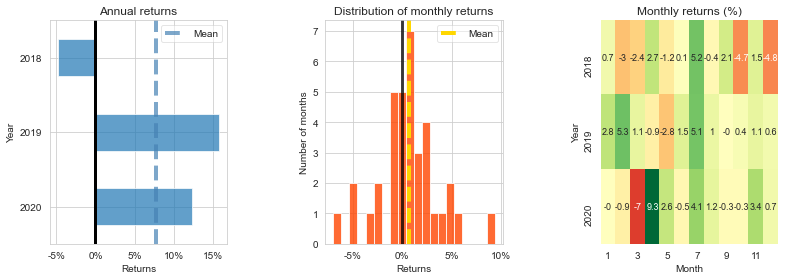

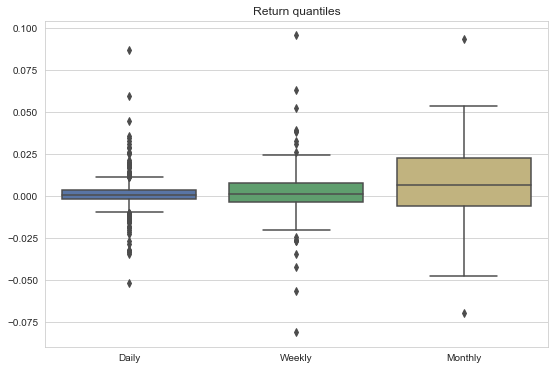

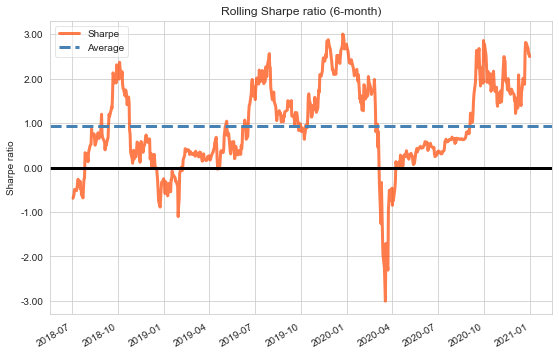

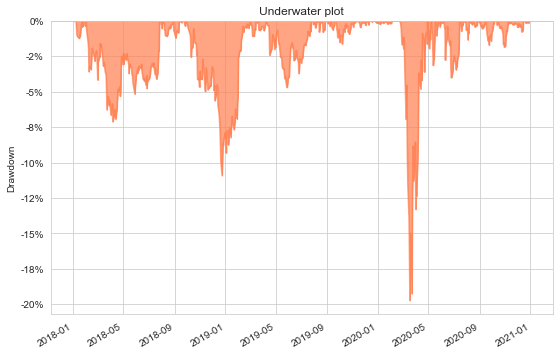

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')